# Loading WDI Data

In [1]:
# loading from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [3]:
cd drive/MyDrive/CompSci526/Project

/content/drive/MyDrive/CompSci526/Project


# Data cleaning and Exploratory analysis

In [4]:
# Load as pandas Dataframe
df = pd.read_csv('WDICSV.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.401410,17.911234,18.463874,18.924037,19.437054,20.026254,20.647969,21.165877,21.863139,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.728819,7.005877,7.308571,7.547226,7.875917,8.243018,8.545483,8.906711,9.261320,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.080931,38.422282,38.722108,38.993157,39.337872,39.695279,40.137847,40.522209,41.011132,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.619475,16.500171,24.605861,25.396929,27.037528,29.137914,31.001049,32.777910,33.747907,NaN


In [5]:
# filter country related Data
first_country_index = np.where(np.array(df["Country Name"]) == "Afghanistan")[0][0]
df_countries = df.iloc[first_country_index:,:]
df_areas = df.iloc[:first_country_index,:]

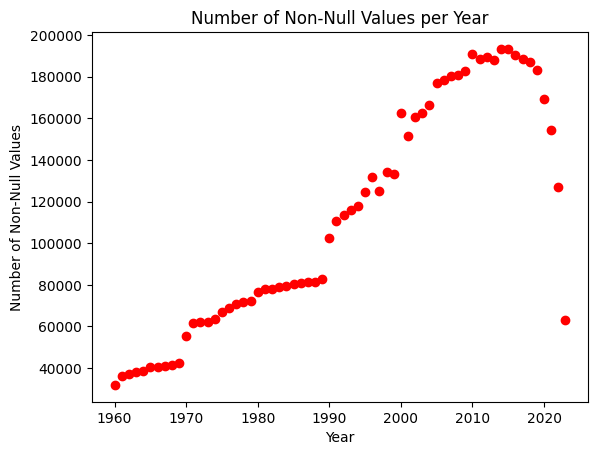

In [6]:
# check missing value distribution over years
years = range(1960,2024)
num_non_nulls = []

for year in years:
  num_non_nulls.append(len(df_countries) - df_countries[str(year)].isnull().sum())

num_non_nulls = np.array(num_non_nulls)
year = np.array(years)

plt.plot(year, num_non_nulls, 'ro')
plt.xlabel('Year')
plt.ylabel('Number of Non-Null Values')
plt.title('Number of Non-Null Values per Year')
plt.show()

In [7]:
# get all unique indicator and country name and code
indicators_unique = np.array(df["Indicator Code"].unique())
countries_unique = df_countries["Country Name"].unique()
country_codes_unique = df_countries["Country Code"].unique()
indicator_names_unique = np.array(df["Indicator Name"].unique())

In [8]:
# check number of non_null values per country: US as example
df[df["Country Name"] == "United States"].isnull().sum()
# checking null values from 1990s until 2022: US as example
df[df["Country Name"] == "United States"].iloc[:,34:-1].notnull().sum().head()

,0
1990,654
1991,700
1992,666
1993,688
1994,714


In [9]:
# For the country name and indicator name verification: create a dictionary with key of indicator_names_unique and value of a dataframe with only that indicator for countries
indicator_dict = {}
for indicator_name in indicator_names_unique:
  indicator_dict[indicator_name] = df_countries[df_countries["Indicator Name"] == indicator_name]

In [10]:
# For the country name and indicator name verification: create a dictionary with key of indicator_names_unique and value of a dataframe with only that indicator for countries
country_dict = {}
for country_name in countries_unique:
  country_dict[country_name] = df_countries[df_countries["Country Name"] == country_name]

### helper tool to find correct name resented in the dataset(indicator and country)

In [11]:
# a tool that find full indicator name(in the table) with part of name
search_term = 'Years'
l = [indicator for indicator in indicator_names_unique if search_term.lower() in indicator.lower()]
print(len(l), l)

24 ['Compulsory education, duration (years)', 'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)', 'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)', 'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)', 'Life expectancy at birth, female (years)', 'Life expectancy at birth, male (years)', 'Life expectancy at birth, total (years)', 'Lower secondary school starting age (years)', 'Number of deaths ages 10-14 years', 'Number of deaths ages 15-19 years', 'Number of deaths ages 20-24 years', 'Number of deaths ages 5-9 years', 'Preprimary education, duration (years)', 'Primary education, duration (years)', 'Primary school starting age (years)', 'Probability of dying among adolescents ages 10-14 years (per 1,000)', 'Probability of dying among adolescents ages 15-19 years (per 1,000)', 'Probability of dying among children ages 5-9 years (per 1,000)', 'Pro

In [12]:
# a tool that find full country name(in the table) with part of name
search_term = 'China'
l = [country for country in countries_unique if search_term.lower() in country.lower()]
print(len(l), l)

3 ['China', 'Hong Kong SAR, China', 'Macao SAR, China']


### check non-null values by country

In [13]:
import pandas as pd

def calculate_non_null_coverage(data, countries):
    """
    Calculate the percentage of non-null coverage for each country.

    Args:
        data (pd.DataFrame): DataFrame containing the data with 'Country' and numerical columns.
        countries (list): List of countries to calculate coverage for.

    Returns:
        pd.DataFrame: DataFrame with countries and their corresponding non-null coverage percentage.
    """
    # Filter the dataset for selected countries
    filtered_data = data[data['Country Name'].isin(countries)]

    # Group by country and calculate non-null percentages
    coverage = (
        filtered_data.set_index('Country Name')
        .iloc[:, 4:]  # Select only the numerical columns (skipping metadata columns)
        .notnull()
        .mean(axis=1)
        .groupby('Country Name')
        .mean()
        .sort_values(ascending=False)
    )

    # Convert to a DataFrame for better visualization
    coverage_df = pd.DataFrame({
        'Country': coverage.index,
        'Coverage (%)': (coverage.values * 100).round(2)
    })

    return coverage_df

In [14]:
# sort coverage by country by Coverage ascending
coverage_by_country = calculate_non_null_coverage(df, countries_unique)

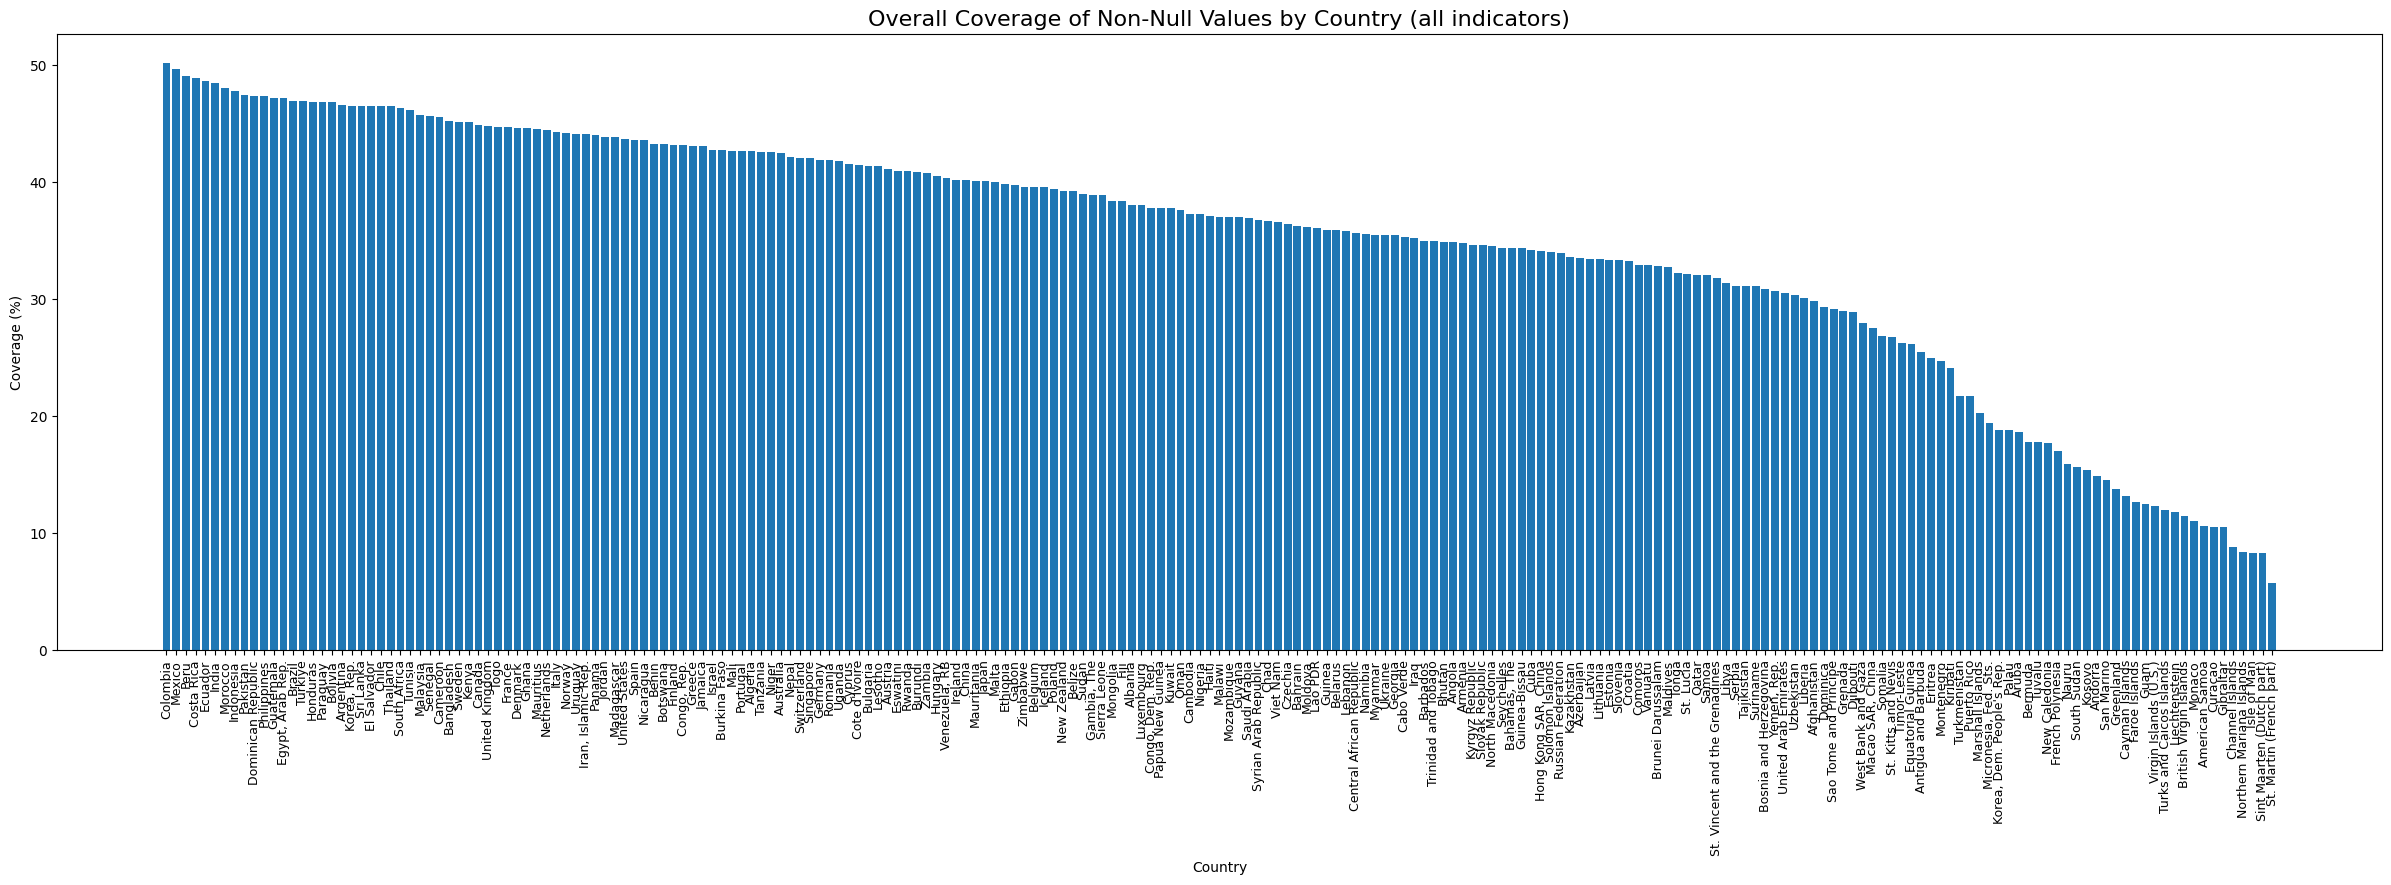

In [15]:
plt.figure(figsize=(30, 8))
plt.bar(x = coverage_by_country["Country"], height = coverage_by_country["Coverage (%)"])
plt.xlabel("Country")
plt.ylabel("Coverage (%)")
plt.title("Overall Coverage of Non-Null Values by Country (all indicators)", fontsize = 16)
# decrease fontsize
plt.xticks(rotation=90, fontsize=9)
plt.show()

In [16]:
# school indicators
df_school = df[df['Indicator Name'].str.contains('school', case=False, na=False)]

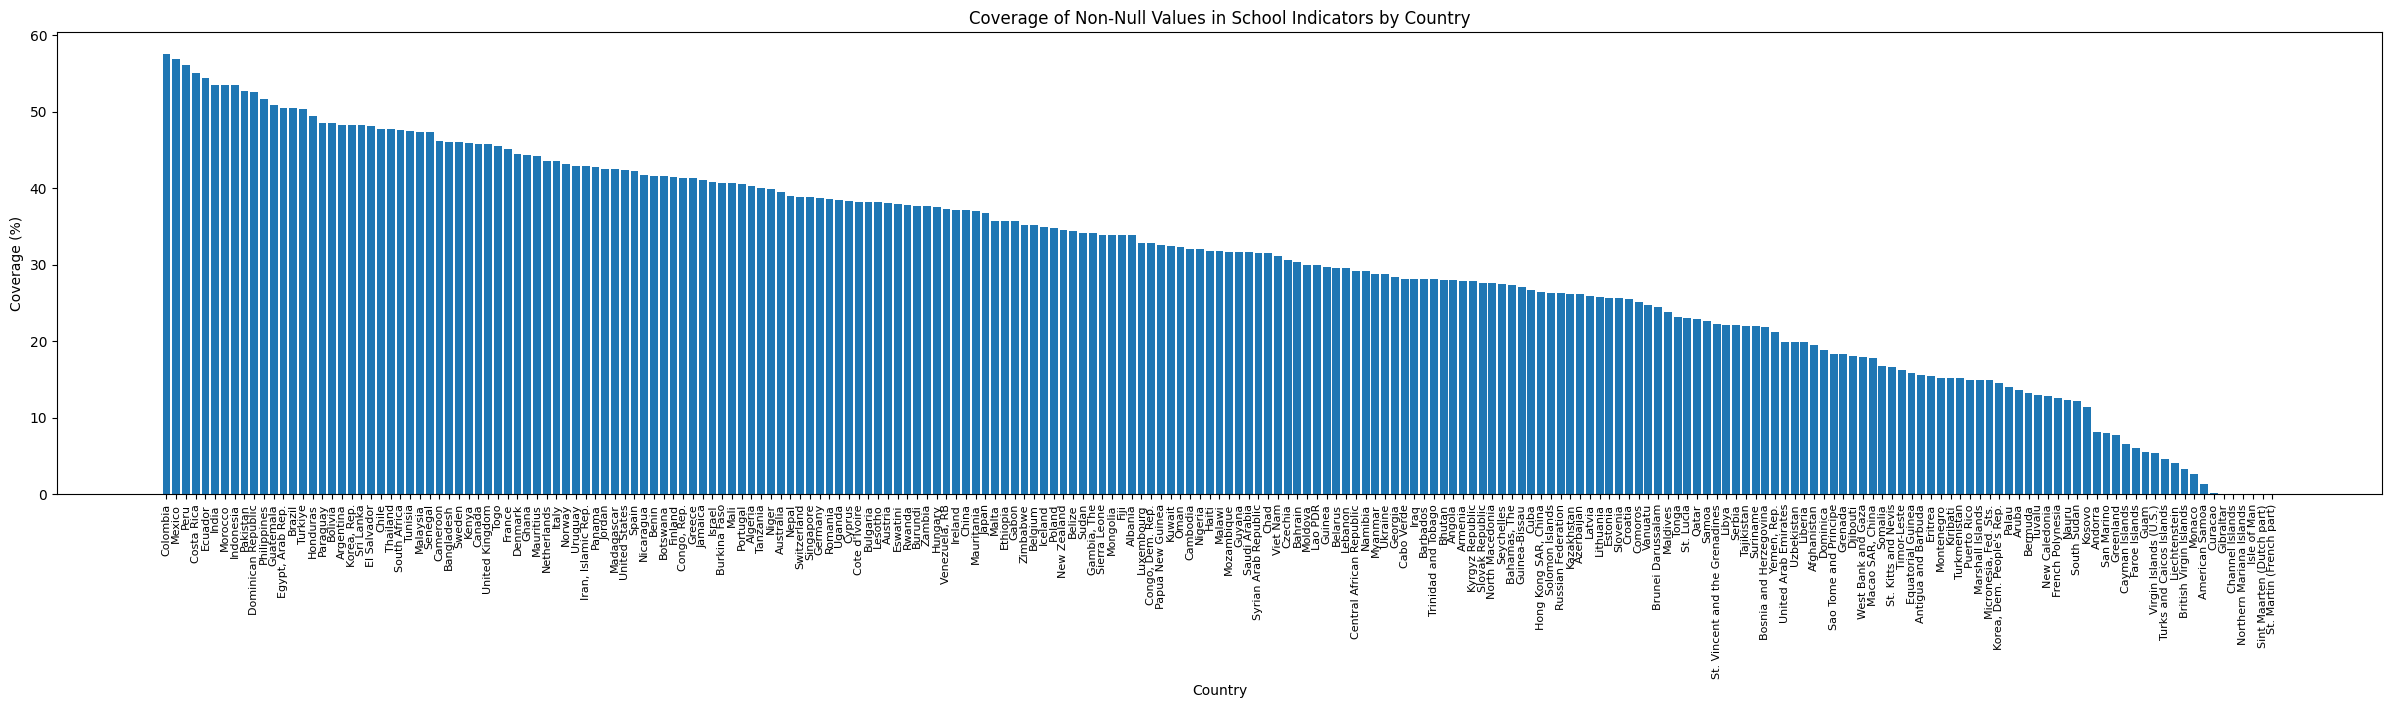

In [17]:
# sort coverage by country by Coverage ascending
coverage_by_country_school = calculate_non_null_coverage(df_school, countries_unique)

plt.figure(figsize=(30, 6))
plt.bar(x = coverage_by_country["Country"], height = coverage_by_country_school["Coverage (%)"])
plt.xlabel("Country")
plt.ylabel("Coverage (%)")
plt.title("Coverage of Non-Null Values in School Indicators by Country")
# decrease fontsize
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Check percentage of non-missing values for each indicator

In [18]:
df_indicator_names = pd.read_csv('WDISeries.csv')
code_map = pd.Series(df_indicator_names['Indicator Name'].values,index=df_indicator_names['Series Code']).to_dict()

years = [str(i) for i in range(1970, 2022)]

# add column for each row representing the percent of years where the value is not NaN in that column
df['percent_not_nan'] = df[years].notna().mean(axis=1)

# average along row values where indicator code matches to get percent of the data for that code that is not NaN
coverage = df.groupby('Indicator Code')['percent_not_nan'].mean()
coverage = coverage.sort_values(ascending=False)

PAGE = 1
print('\033[1mCoverage   Title\033[0m')
for i in range(10 * (PAGE - 1), 10 * PAGE):
  print(f'{100*coverage.iloc[i]:.2f}%    ', code_map.get(coverage.index[i], 'unknown'), f'({coverage.index[i]})')

Coverage   Title
99.62%     Population ages 00-04, female (% of female population) (SP.POP.0004.FE.5Y)
99.62%     Population ages 45-49, male (% of male population) (SP.POP.4549.MA.5Y)
99.62%     Population, male (% of total population) (SP.POP.TOTL.MA.ZS)
99.62%     Survival to age 65, female (% of cohort) (SP.DYN.TO65.FE.ZS)
99.62%     Population ages 20-24, male (% of male population) (SP.POP.2024.MA.5Y)
99.62%     Population ages 25-29, female (% of female population) (SP.POP.2529.FE.5Y)
99.62%     Population ages 70-74, female (% of female population) (SP.POP.7074.FE.5Y)
99.62%     Population ages 30-34, female (% of female population) (SP.POP.3034.FE.5Y)
99.62%     Population ages 30-34, male (% of male population) (SP.POP.3034.MA.5Y)
99.62%     Population ages 35-39, female (% of female population) (SP.POP.3539.FE.5Y)


In [19]:
pairs = [(f'{100*coverage.iloc[i]:.2f}%    ', code_map.get(coverage.index[i], 'unknown'), f'({coverage.index[i]})') for i in range(len(coverage))]
print_cnt = 0
for i in filter(lambda x: 'Education' in x[1] or 'School' in x[1], pairs):
  print(*i)
  print_cnt += 1
  if print_cnt>10:
    break

77.50%     School enrollment, primary (% gross) (SE.PRM.ENRR)
73.55%     School enrollment, primary, female (% gross) (SE.PRM.ENRR.FE)
73.55%     School enrollment, primary, male (% gross) (SE.PRM.ENRR.MA)
71.49%     School enrollment, primary (gross), gender parity index (GPI) (SE.ENR.PRIM.FM.ZS)
67.99%     School enrollment, secondary (% gross) (SE.SEC.ENRR)
62.85%     School enrollment, secondary, female (% gross) (SE.SEC.ENRR.FE)
62.85%     School enrollment, secondary, male (% gross) (SE.SEC.ENRR.MA)
61.99%     School enrollment, tertiary (% gross) (SE.TER.ENRR)
61.17%     School enrollment, preprimary (% gross) (SE.PRE.ENRR)
60.81%     School enrollment, secondary (gross), gender parity index (GPI) (SE.ENR.SECO.FM.ZS)
59.76%     School enrollment, primary, private (% of total primary) (SE.PRM.PRIV.ZS)


In [20]:
pairs = [(f'{100*coverage.iloc[i]:.2f}%    ', code_map.get(coverage.index[i], 'unknown'), f'({coverage.index[i]})') for i in range(len(coverage))]
print_cnt = 0
for i in filter(lambda x: 'GDP' in x[1] or 'GDP per capita' in x[1], pairs):
  print(*i)
  print_cnt += 1
  if print_cnt>10:
    break

86.77%     GDP per capita (current US$) (NY.GDP.PCAP.CD)
86.75%     GDP (current US$) (NY.GDP.MKTP.CD)
86.68%     GDP growth (annual %) (NY.GDP.MKTP.KD.ZG)
86.66%     GDP per capita growth (annual %) (NY.GDP.PCAP.KD.ZG)
86.47%     GDP per capita (constant 2015 US$) (NY.GDP.PCAP.KD)
86.45%     GDP (constant 2015 US$) (NY.GDP.MKTP.KD)
86.33%     Inflation, GDP deflator (annual %) (NY.GDP.DEFL.KD.ZG)
84.84%     Forest rents (% of GDP) (NY.GDP.FRST.RT.ZS)
84.84%     Mineral rents (% of GDP) (NY.GDP.MINR.RT.ZS)
84.61%     Total natural resources rents (% of GDP) (NY.GDP.TOTL.RT.ZS)
82.57%     Merchandise trade (% of GDP) (TG.VAL.TOTL.GD.ZS)


# Data Analysis

### Case Study

In [21]:
# case study plots: Koreaa dn Niger as example

import plotly.graph_objects as go

# Select countries of interest
countries_of_interest = ['Korea, Rep.','Niger']
indicator_names = ['School enrollment, tertiary (% gross)', 'GDP per capita (current US$)']

for indicator_name in indicator_names:
    # Filter the dataframe for those countries
    indicator_df_filtered = indicator_dict[indicator_name]
    indicator_df_filtered = indicator_df_filtered[indicator_df_filtered['Country Name'].isin(countries_of_interest)]

    # Set 'Country Name' as index and filter out necessary columns (years)
    indicator_df_filtered.set_index('Country Name', inplace=True)
    years = [str(year) for year in range(1960, 2024)]  # Modify this range as needed
    indicator_df_filtered_years = indicator_df_filtered[years]

    # Create the plot using Plotly
    fig = go.Figure()

    for country in countries_of_interest:
        fig.add_trace(go.Scatter(
            x=years,
            y=indicator_df_filtered_years.loc[country],
            mode='lines+markers',
            name=country
        ))

    # Update layout
    fig.update_layout(
        title=f'{indicator_name}',
        xaxis_title='Year',
        yaxis_title=f'{indicator_name}',
        legend_title='Country',
        template='plotly_white',
        hovermode='x unified'
    )

    # Show the plot
    fig.show()

### Regression and p-value Test

In [22]:
import statsmodels.api as sm

x_indicator_names = [
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)',
    'Government expenditure on education, total (% of GDP)',
    'Pupil-teacher ratio, primary',
    'Pupil-teacher ratio, secondary',
    'Pupil-teacher ratio, tertiary',
    'Current health expenditure (% of GDP)',
    'Control of Corruption: Estimate',
    'Inflation, consumer prices (annual %)'
]
y_indicator_name = 'GDP per capita (current US$)'

df1 = indicator_dict[y_indicator_name]

df1_melted = df1.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                      var_name='Year', value_name=y_indicator_name)
df1_melted = df1_melted[['Country Name', 'Year', y_indicator_name]]
df1_melted['Year'] = df1_melted['Year'].astype(int)

combined_df = df1_melted.copy()

# loop through education expenditure indicator
for x_indicator_name in x_indicator_names:
    df2 = indicator_dict[x_indicator_name]
    df2_melted = df2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                          var_name='Year', value_name=x_indicator_name)
    df2_melted = df2_melted[['Country Name', 'Year', x_indicator_name]]
    df2_melted['Year'] = df2_melted['Year'].astype(int)

    combined_df = pd.merge(combined_df, df2_melted, on=['Country Name', 'Year'], how='inner')

cleaned_combined_df = combined_df.dropna()


# build model
y = cleaned_combined_df[y_indicator_name]
X = cleaned_combined_df[x_indicator_names]
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.608
Model:                                      OLS   Adj. R-squared:                  0.603
Method:                           Least Squares   F-statistic:                     120.4
Date:                          Tue, 10 Dec 2024   Prob (F-statistic):          1.53e-150
Time:                                  21:26:58   Log-Likelihood:                -8489.2
No. Observations:                           788   AIC:                         1.700e+04
Df Residuals:                               777   BIC:                         1.705e+04
Df Model:                                    10                                         
Covariance Type:                      nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025 

### Pearson Correlation Test

Correlation Results:
Korea, Rep. - Primary completion rate, total (% of relevant age group): -0.06097421157230178
Niger - Primary completion rate, total (% of relevant age group): 0.9277710497344086
Korea, Rep. - Primary education, teachers: 0.8882238858666761
Niger - Primary education, teachers: 0.9322812421457087
Korea, Rep. - Children out of school (% of primary school age): -0.37722448641632483
Niger - Children out of school (% of primary school age): -0.8825607679695515
Korea, Rep. - School enrollment, secondary (% gross): 0.16273288617894358
Niger - School enrollment, secondary (% gross): 0.9289685327506787
Korea, Rep. - School enrollment, tertiary (% gross): 0.884695986427367
Niger - School enrollment, tertiary (% gross): 0.8251137667071228


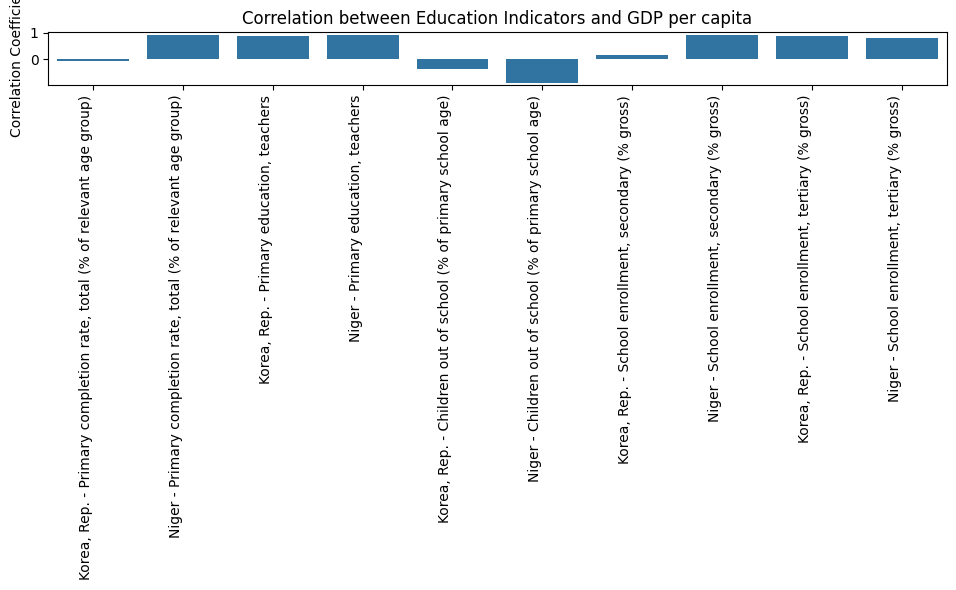

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# No lagging

# Define the countries of interest and the years for analysis
countries_of_interest = ['Korea, Rep.', 'Niger']
gdp_indicator_name = 'GDP per capita (current US$)'
gdp_years = [str(year) for year in range(1995, 2010)]
education_indicator_names = [
    'Primary completion rate, total (% of relevant age group)',
    'Primary education, teachers',
    'Children out of school (% of primary school age)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)'
]

# Extract the GDP per capita data
gdp_df = indicator_dict.get(gdp_indicator_name)

# Filter for countries of interest and set index
gdp_df_filtered = gdp_df[gdp_df['Country Name'].isin(countries_of_interest)]
gdp_df_filtered.set_index('Country Name', inplace=True)
gdp_df_filtered_years = gdp_df_filtered[gdp_years]

# Prepare to store correlation results
correlation_results = {}

# Iterate through each education indicator and calculate correlation with GDP
for indicator_name in education_indicator_names:
    # Get the education data for the current indicator
    education_df = indicator_dict.get(indicator_name)
    if education_df is not None:
        education_df = education_df[education_df['Country Name'].isin(countries_of_interest)]
        education_df.set_index('Country Name', inplace=True)
        education_df_years = education_df[gdp_years]

        # Combine the data for correlation analysis by transposing and joining
        combined = education_df_years.T.join(gdp_df_filtered_years.T, lsuffix='_edu', rsuffix='_gdp').dropna()

        # Calculate correlation for Korea, Rep.
        korea_data = combined[['Korea, Rep._edu', 'Korea, Rep._gdp']].dropna()
        korea_corr = korea_data.corr().iloc[0, 1]  # Extract the correlation coefficient between the two columns
        correlation_results[f"Korea, Rep. - {indicator_name}"] = korea_corr

        # Calculate correlation for Niger
        niger_data = combined[['Niger_edu', 'Niger_gdp']].dropna()
        niger_corr = niger_data.corr(method='pearson').iloc[0, 1]  # Extract the correlation coefficient between the two columns
        correlation_results[f"Niger - {indicator_name}"] = niger_corr

# Print the correlation results for each indicator and each country
print("Correlation Results:")
for indicator, corr_value in correlation_results.items():
    print(f"{indicator}: {corr_value}")

# Optionally, you can visualize the results using a bar plot for better readability
plt.figure(figsize=(10, 6))
sns.barplot(x=list(correlation_results.keys()), y=list(correlation_results.values()))
plt.xticks(rotation=90, ha='right')
plt.title('Correlation between Education Indicators and GDP per capita')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


<ipython-input-24-0fe728cc5548>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




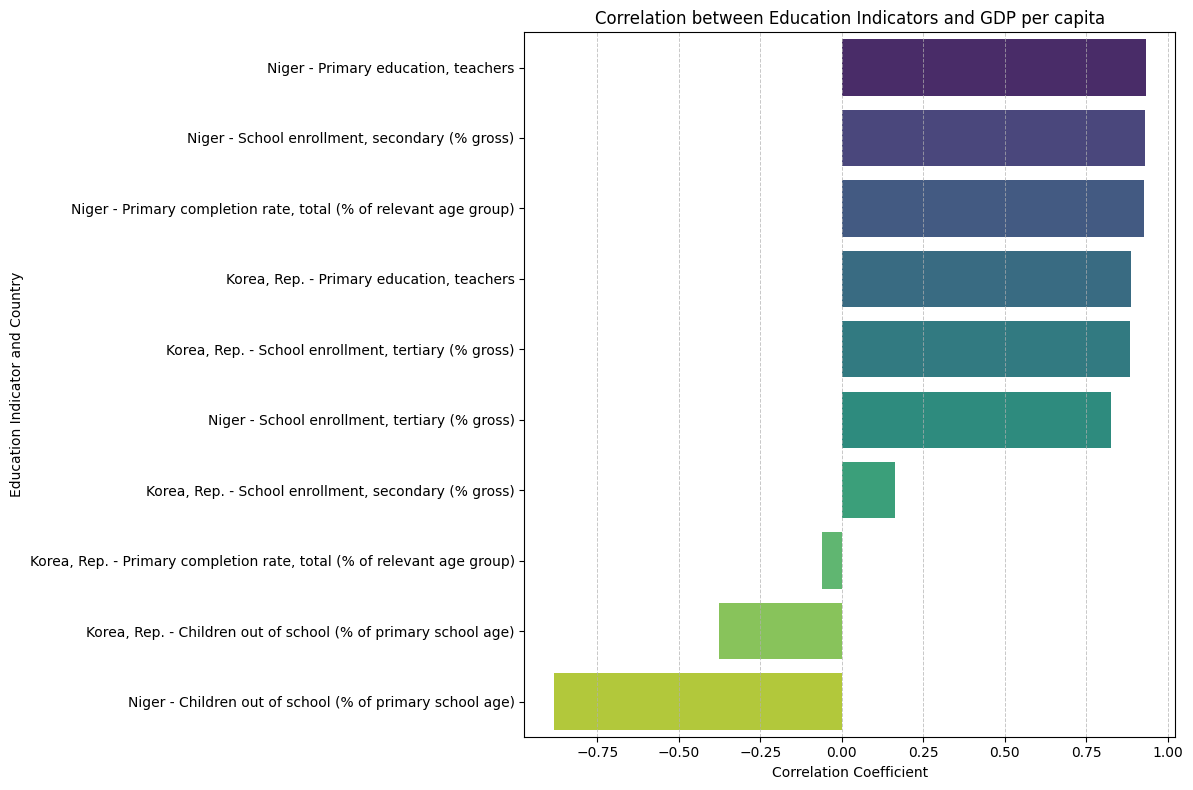

In [24]:
# Create a DataFrame for better visualization
corr_df = pd.DataFrame(
    list(correlation_results.items()),
    columns=["Indicator and Country", "Correlation Coefficient"]
)

# Sort values for better presentation
corr_df.sort_values(by="Correlation Coefficient", ascending=False, inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=corr_df,
    x="Correlation Coefficient",
    y="Indicator and Country",
    palette="viridis"
)
plt.title('Correlation between Education Indicators and GDP per capita')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Education Indicator and Country')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

### Granger Causality Test

In [25]:
def perform_adf_test(df, country_name, indicator_code):
    """
    Perform the Augmented Dickey-Fuller (ADF) test for stationarity on a specified indicator for a given country.

    Args:
    - dataset
    - country_name (str): Name of the country to filter the data.
    - indicator_code (str): Code of the indicator to analyze (e.g., "NY.GDP.MKTP.KD.ZG" for GDP growth).

    Returns:
    - dict: Summary of the ADF test results, including the test statistic, p-value, critical values, and stationarity status.
    """
    try:
        # Filter data for the specified country and indicator
        filtered_data = df[(df["Country Name"] == country_name) &
                           (df["Indicator Code"] == indicator_code)]

        # Extract the relevant years as a time series
        time_series = filtered_data.iloc[:, 4:].transpose()  # Years start from column index 4
        time_series.columns = ["Value"]
        time_series.reset_index(drop=True, inplace=True)
        time_series["Value"] = pd.to_numeric(time_series["Value"], errors="coerce")
        time_series = time_series.dropna()

        plt.plot(time_series.index, time_series["Value"])
        plt.xlabel("Year")
        plt.ylabel("Value")
        plt.show()

        # Perform the ADF test
        adf_result = adfuller(time_series["Value"])
        result_summary = {
            "Country": country_name,
            "Indicator": indicator_code,
            "Indicator Name": filtered_data["Indicator Name"].iloc[0],
            "ADF Statistic": adf_result[0],
            "p-value": adf_result[1],
            "Critical Values": adf_result[4],
            "Stationarity": "Stationary" if adf_result[1] <= 0.05 else "Non-stationary"
        }
        return result_summary

    except Exception as e:
        return {"Error": str(e)}



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0525  , p=0.8201  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=0.0571  , p=0.8111  , df=1
likelihood ratio test: chi2=0.0571  , p=0.8112  , df=1
parameter F test:         F=0.0525  , p=0.8201  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0630  , p=0.9390  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=0.1464  , p=0.9294  , df=2
likelihood ratio test: chi2=0.1461  , p=0.9295  , df=2
parameter F test:         F=0.0630  , p=0.9390  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5674  , p=0.6411  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=2.1276  , p=0.5463  , df=3
likelihood ratio test: chi2=2.0654  , p=0.5589  , df=3
parameter F test:         F=0.5674  , p=0.6411  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5508  , p=0.7002  , df_d

<ipython-input-26-df948176288b>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




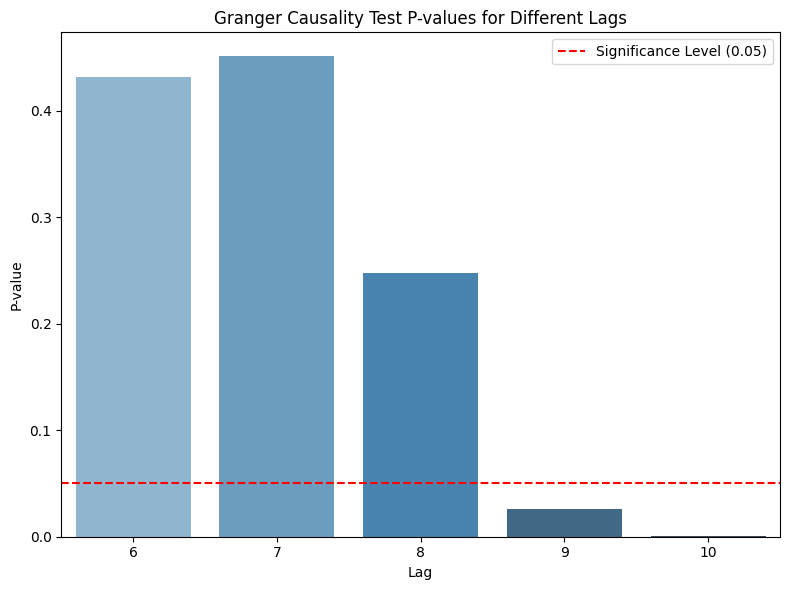

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target country and indicators
country_name = "Korea, Rep."
gdp_indicator_name = "GDP per capita (current US$)"
education_indicator_name = "School enrollment, tertiary (% gross)"

# Select the desired years for analysis
years = [str(year) for year in range(1985, 2024)]

# Extract GDP and education data for the country
gdp_df = indicator_dict.get(gdp_indicator_name)
education_df = indicator_dict.get(education_indicator_name)

# Filter the data for the selected country and years
gdp_data = gdp_df[gdp_df["Country Name"] == country_name][years].T.dropna()
education_data = education_df[education_df["Country Name"] == country_name][years].T.dropna()

# Ensure both time series have the same index and length
gdp_data.columns = ["GDP"]
education_data.columns = ["Education"]
combined_data = pd.concat([education_data, gdp_data], axis=1).dropna()

# Apply Granger causality test
granger_test_result = grangercausalitytests(combined_data, maxlag=10)

# Extract p-values from the Granger test results for each lag
p_values = {
    6: granger_test_result[6][0]['ssr_chi2test'][1],
    7: granger_test_result[7][0]['ssr_chi2test'][1],
    8: granger_test_result[8][0]['ssr_chi2test'][1],
    9: granger_test_result[9][0]['ssr_chi2test'][1],
    10: granger_test_result[10][0]['ssr_chi2test'][1]
}

# Plot the p-values for each lag
lags = list(p_values.keys())
p_vals = list(p_values.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=lags, y=p_vals, palette="Blues_d")
plt.axhline(0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('Granger Causality Test P-values for Different Lags')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
# Define the target country and indicators
country_name = "Korea, Rep."
gdp_indicator_name = "GDP per capita (current US$)"
education_indicator_name = "School enrollment, tertiary (% gross)"

# Select the desired years for analysis
years = [str(year) for year in range(1985, 2024)]

# Extract GDP and education data for the country
gdp_df = indicator_dict.get(gdp_indicator_name)
education_df = indicator_dict.get(education_indicator_name)

# Filter the data for the selected country and years
gdp_data = gdp_df[gdp_df["Country Name"] == country_name][years].T.dropna()
education_data = education_df[education_df["Country Name"] == country_name][years].T.dropna()

In [28]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, name):
    result = adfuller(series)
    print(f"{name} ADF Statistic: {result[0]}, p-value: {result[1]}")
    if result[1] > 0.05:
        print(f"{name} is non-stationary. We must transform it.")
    else:
        print(f"{name} is stationary.")

# Check for stationarity
check_stationarity(gdp_data.squeeze(), "GDP")
check_stationarity(education_data.squeeze(), "Education")

# If non-stationary, difference the series
gdp_data_diff = gdp_data.diff().dropna()
education_data_diff = education_data.diff().dropna()

GDP ADF Statistic: -0.3794523395002928, p-value: 0.9134733863156557
GDP is non-stationary. We must transform it.
Education ADF Statistic: -1.44159884778425, p-value: 0.562178746242429
Education is non-stationary. We must transform it.


In [29]:
# Ensure alignment after transformations
gdp_data_diff.columns = ["GDP"]
education_data_diff.columns = ["Education"]
combined_data_differed = pd.concat([education_data_diff, gdp_data_diff], axis=1).dropna()

In [30]:
granger_test_result = grangercausalitytests(combined_data, maxlag=9, verbose=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



<ipython-input-31-c594635177d8>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




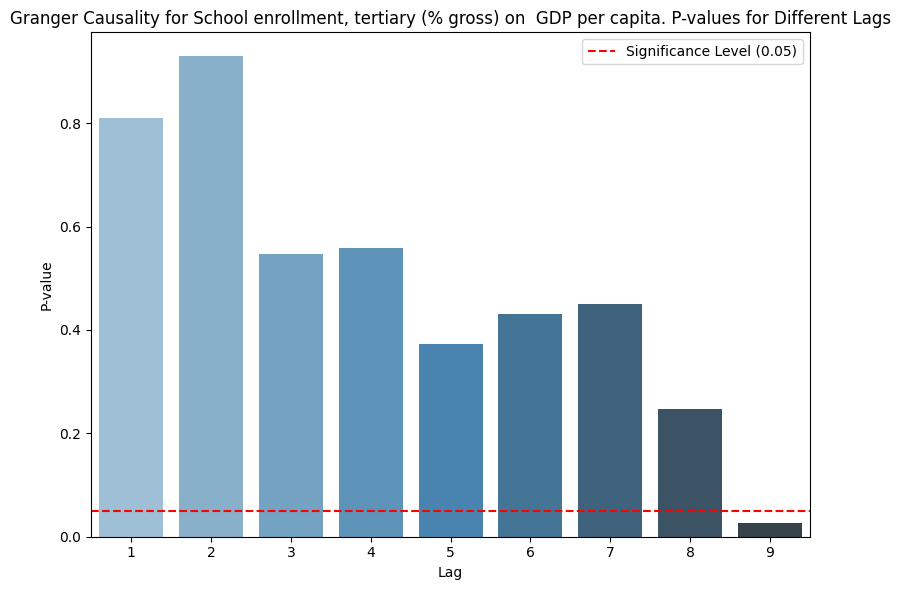

In [31]:
optimal_lag = 9

# Extract p-values dynamically for all tested lags
p_values = {lag: granger_test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, optimal_lag+1)}

# Plot dynamically adjusted p-values
lags = list(p_values.keys())
p_vals = list(p_values.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=lags, y=p_vals, palette="Blues_d")
plt.axhline(0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('Granger Causality for School enrollment, tertiary (% gross) on  GDP per capita. P-values for Different Lags')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# make a function that runs through the indicators and looks for granger causality
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def run_granger_causality_on_indicators(data, country_name, gdp_indicator, indicators_dict, years, max_lag=10):
    """
    Perform Granger causality analysis between GDP and all other indicators for a specific country.

    Args:
    - data (dict): A dictionary containing indicator dataframes.
    - country_name (str): The country to analyze.
    - gdp_indicator (str): The GDP indicator name (e.g., "GDP per capita (current US$)").
    - indicators (dict): A dictionary of indicator names and their respective dataframes.
    - years (list): List of years to include in the analysis.
    - max_lag (int): Maximum number of lags for Granger causality testing.

    Returns:
    - dict: Results of Granger causality tests for each indicator.
    """
    def check_stationarity(series):
        result = adfuller(series)
        return result[1] <= 0.05  # True if stationary, False otherwise

    results = {}
    gdp_df = data.get(gdp_indicator)
    gdp_data = gdp_df[gdp_df["Country Name"] == country_name][years].T.dropna()
    gdp_data.columns = ["GDP"]

    # Check and transform GDP if needed
    if not check_stationarity(gdp_data.squeeze()):
        gdp_data = gdp_data.diff().dropna()
        gdp_data.columns = ["GDP"]

    for indicator_name, indicator_df in indicators_dict.items():
        try:
            # Extract data for the indicator
            indicator_data = indicator_df[indicator_df["Country Name"] == country_name][years].T.dropna()
            indicator_data.columns = ["Indicator"]

            # Check and transform indicator if needed
            if not check_stationarity(indicator_data.squeeze()):
                indicator_data = indicator_data.diff().dropna()
                indicator_data.columns = ["Indicator"]

            # Combine GDP and indicator data
            combined_data = pd.concat([indicator_data, gdp_data], axis=1).dropna()

            # Apply Granger causality test
            granger_test_result = grangercausalitytests(combined_data, max_lag, verbose=False)

            # Extract p-values for each lag
            p_values = {lag: granger_test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag+1)}

            # Determine if Granger causality exists
            causality_found = any(p <= 0.05 for p in p_values.values())

            # Store results
            results[indicator_name] = {
                "P-Values": p_values,
                "Causality Found": causality_found
            }

        except Exception as e:
            results[indicator_name] = {"Error": str(e)}

    return results


In [33]:
# make a function that runs through the indicators and looks for granger causality
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def granger_causality_analysis(countries, gdp_indicator, indicators, countries_dict, max_lag=15):
    """
    Perform Granger causality analysis for countries using panel data in countries_dict.

    Args:
        countries (list): List of countries to analyze.
        gdp_indicator (str): Name of the GDP indicator.
        education_indicators (list): List of education-related indicators to analyze.
        countries_dict (dict): Dictionary where keys are country names, and values are DataFrames with panel data.
        max_lag (int): Maximum lag to consider for Granger causality.

    Returns:
        dict: Results of Granger causality tests for each country and indicator.
    """
    # Dictionary to store results
    results = {}

    for country in countries:
        print(f"\n=== Granger Causality Analysis for {country} ===")
        country_results = {}

        # Ensure the country exists in the countries_dict
        if country not in countries_dict:
            print(f"Data for '{country}' not found in countries_dict. Skipping.")
            continue

        # Get the panel data for the country
        panel_data = countries_dict[country]

        # Ensure the GDP indicator exists in the panel data
        gdp_data = panel_data[panel_data['Indicator Name'] == gdp_indicator]
        if gdp_data.empty:
            print(f"GDP indicator '{gdp_indicator}' not found for {country}. Skipping.")
            continue

        # Transform GDP data
        gdp_series = gdp_data.iloc[:, 4:].T  # Extract years as columns, transpose
        gdp_series.columns = ['GDP Growth']  # Rename column
        gdp_series.index = gdp_series.index.astype(int)  # Ensure years are integers

        for edu_indicator in indicators:
            try:
                print(f"\nAnalyzing indicator: {edu_indicator}")

                # Ensure the education indicator exists in the panel data
                edu_data = panel_data[panel_data['Indicator Name'] == edu_indicator]
                if edu_data.empty:
                    print(f"Indicator '{edu_indicator}' not found for {country}. Skipping.")
                    continue

                # Transform education data
                edu_series = edu_data.iloc[:, 4:].T  # Extract years as columns, transpose
                edu_series.columns = ['Indicator']  # Rename column
                edu_series.index = edu_series.index.astype(int)  # Ensure years are integers

                # Combine GDP and education indicator into a single DataFrame
                data = pd.concat([gdp_series, edu_series], axis=1).dropna()  # Drop rows with NaN values

                if data.shape[0] < 10:
                    continue
                # Perform Augmented Dickey-Fuller (ADF) test for stationarity
                adf_gdp = adfuller(data['GDP Growth'])
                adf_ind = adfuller(data['Indicator'])

                # Differencing if non-stationary
                data_diff = pd.DataFrame(index=data.index)
                if adf_gdp[1] > 0.05:
                    data_diff['GDP Growth Diff'] = data['GDP Growth'].diff()
                else:
                    data_diff['GDP Growth Diff'] = data['GDP Growth']
                if adf_ind[1] > 0.05:
                    data_diff['Indicator Diff'] = data['Indicator'].diff()
                else:
                    data_diff['Indicator Diff'] = data['Indicator']


                # Drop NaN values after differencing
                data_diff = data_diff.dropna()


                # Check asgain for stationarity, if not, difference again
                adf_gdp_2 = adfuller(data_diff['GDP Growth Diff'])
                adf_ind_2 = adfuller(data_diff['Indicator Diff'])

                if adf_gdp_2[1] > 0.05:
                    data_diff['GDP Growth Diff'] = data_diff['GDP Growth Diff'].diff()
                else:
                    data_diff['GDP Growth Diff'] = data_diff['GDP Growth Diff']
                if adf_ind_2[1] > 0.05:
                    data_diff['Indicator Diff'] = data_diff['Indicator Diff'].diff()
                else:
                    data_diff['Indicator Diff'] = data_diff['Indicator Diff']

                data_diff = data_diff.dropna()


                # Check for constant series
                if data_diff['GDP Growth Diff'].nunique() <= 1 or data_diff['Indicator Diff'].nunique() <= 1:
                    print(f"One of the series is constant after differencing for {country} with indicator '{edu_indicator}'. Skipping.")
                    continue

                try:
                    # Try Granger causality test
                    # print(data_diff)
                    max_lag = int(data_diff.shape[0]/3)-1

                    granger_results = grangercausalitytests(data_diff[['GDP Growth Diff', 'Indicator Diff']], maxlag=max_lag, verbose=False)

                    # Collect p-values for each lag
                    p_values = [granger_results[lag][0]['ssr_ftest'][1] for lag in range(1, max_lag + 1)]
                    min_p_value = min(p_values)
                    optimal_lag = p_values.index(min_p_value) + 1

                    # Check if any p-value is less than 0.05
                    if (min_p_value < 0.05):
                          # print(f"Indicator '{edu_indicator}' Granger-causes GDP Growth at lag {optimal_lag} (p-value: {min_p_value:.4f})")
                          country_results[edu_indicator] = {
                              'Granger_causality': True,
                              'Optimal_lag': optimal_lag,
                              'p_value': min_p_value
                          }
                          print(f"Granger causality detected for indicator '{edu_indicator}' in {country} with lag {optimal_lag}")
                    else:
                        # print(f"No Granger causality detected for indicator '{edu_indicator}' in {country}.")
                        country_results[edu_indicator] = {
                            'Granger_causality': False,
                            'Optimal_lag': optimal_lag,
                            'p_value': min_p_value
                        }
                except Exception as e:
                    print(f"An error occurred while testing Granger causality for '{edu_indicator}' in {country}: {e}")
                    continue
            except Exception as e:
                print(f"An error occurred while processing indicator '{edu_indicator}' in {country}: {e}")
                continue

        # Store results for the country
        results[country] = country_results
    return results

In [34]:
# List of selected countries (you can modify this list)
developed_countries = ['United States', 'Germany', 'Japan']
emerging_countries = ['India', 'China']
case_study =  ["Niger", "Korea, Rep."]
selected_countries = developed_countries + emerging_countries + case_study

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
#check if string contains word "school"
contains_school = np.array([True if 'school' in item.lower() else False for item in indicator_names_unique])
education_indicators = indicator_names_unique[contains_school]

In [37]:
# Countries and indicators

gdp_indicator = "GDP per capita (current US$)"
#check if string contains word "school"
contains_school = np.array([True if 'school' in item.lower() else False for item in indicator_names_unique])
education_indicators = indicator_names_unique[contains_school]
#indicator_names_unique

# Perform analysis
results_education = granger_causality_analysis(
    countries=selected_countries,
    gdp_indicator=gdp_indicator,
    indicators=education_indicators,
    countries_dict=country_dict
)


=== Granger Causality Analysis for United States ===

Analyzing indicator: Adjusted net enrollment rate, primary (% of primary school age children)

Analyzing indicator: Adjusted net enrollment rate, primary, female (% of primary school age children)

Analyzing indicator: Adjusted net enrollment rate, primary, male (% of primary school age children)

Analyzing indicator: Adolescents out of school (% of lower secondary school age)

Analyzing indicator: Adolescents out of school, female (% of female lower secondary school age)

Analyzing indicator: Adolescents out of school, male (% of male lower secondary school age)

Analyzing indicator: Children out of school (% of primary school age)

Analyzing indicator: Children out of school, female (% of female primary school age)

Analyzing indicator: Children out of school, male (% of male primary school age)

Analyzing indicator: Children out of school, primary

Analyzing indicator: Children out of school, primary, female

Analyzing indicator

In [38]:
print("\n=== Granger Causality Summary for all Indicators ===")
for country, indicators in results_education.items():
    print(f"\nCountry: {country}")
    for indicator, result in indicators.items():
        if result['Granger_causality']:
            print(f" - Indicator '{indicator}' Granger-causes GDP Growth at lag {result['Optimal_lag']} (p-value: {result['p_value']:.4f})")
        else:
            continue
            # print(f" - Indicator '{indicator}' does NOT Granger-cause GDP Growth (p-value: {result['p_value']:.4f})")


=== Granger Causality Summary for all Indicators ===

Country: United States
 - Indicator 'School enrollment, primary (gross), gender parity index (GPI)' Granger-causes GDP Growth at lag 3 (p-value: 0.0035)
 - Indicator 'School enrollment, primary and secondary (gross), gender parity index (GPI)' Granger-causes GDP Growth at lag 1 (p-value: 0.0045)
 - Indicator 'School enrollment, secondary (gross), gender parity index (GPI)' Granger-causes GDP Growth at lag 2 (p-value: 0.0012)
 - Indicator 'School enrollment, tertiary (% gross)' Granger-causes GDP Growth at lag 8 (p-value: 0.0000)
 - Indicator 'School enrollment, tertiary, female (% gross)' Granger-causes GDP Growth at lag 2 (p-value: 0.0003)
 - Indicator 'School enrollment, tertiary, male (% gross)' Granger-causes GDP Growth at lag 9 (p-value: 0.0006)

Country: Germany
 - Indicator 'School enrollment, primary, private (% of total primary)' Granger-causes GDP Growth at lag 2 (p-value: 0.0322)

Country: Japan
 - Indicator 'School enro

In [39]:
def flatten_granger_results(results):
    """
    Flatten the nested Granger causality results into a DataFrame.

    Args:
        results (dict): Nested dictionary from granger_causality_analysis.

    Returns:
        pd.DataFrame: Flattened DataFrame with columns: Country, Indicator, Lag, P-Value.
    """
    rows = []
    for country, indicators in results.items():
        for indicator, result in indicators.items():
            if result['Granger_causality']:  # Only include cases with Granger causality
                rows.append({
                    "Country": country,
                    "Indicator": indicator,
                    "Lag": result['Optimal_lag'],
                    "P-Value": result['p_value']
                })
    return pd.DataFrame(rows)

results_df = flatten_granger_results(results_education)

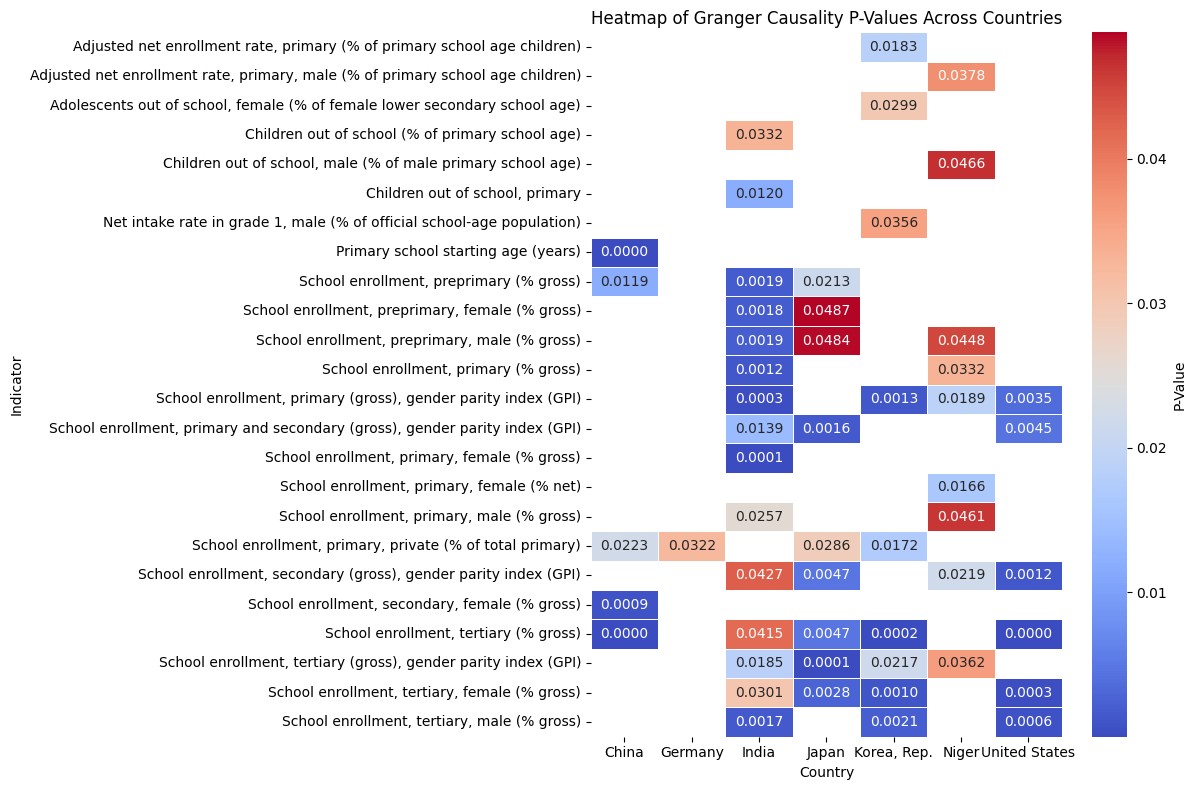

In [40]:

# Plot the heatmap of P-Values
pivot_data = results_df.pivot(index="Indicator", columns="Country", values="P-Value")

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_data,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    cbar_kws={'label': 'P-Value'},
    linewidths=0.5,
)
plt.title("Heatmap of Granger Causality P-Values Across Countries")
plt.xlabel("Country")
plt.ylabel("Indicator")
plt.tight_layout()
plt.show()

# Plot bar chart for frequency of Granger causality by country
# frequency_data = results_df.groupby("Country").size()

# plt.figure(figsize=(10, 6))
# frequency_data.plot(kind="bar", color="skyblue", edgecolor="black")
# plt.title("Frequency of Granger Causality Across Countries")
# plt.ylabel("Number of Indicators Showing Granger Causality")
# plt.xlabel("Country")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

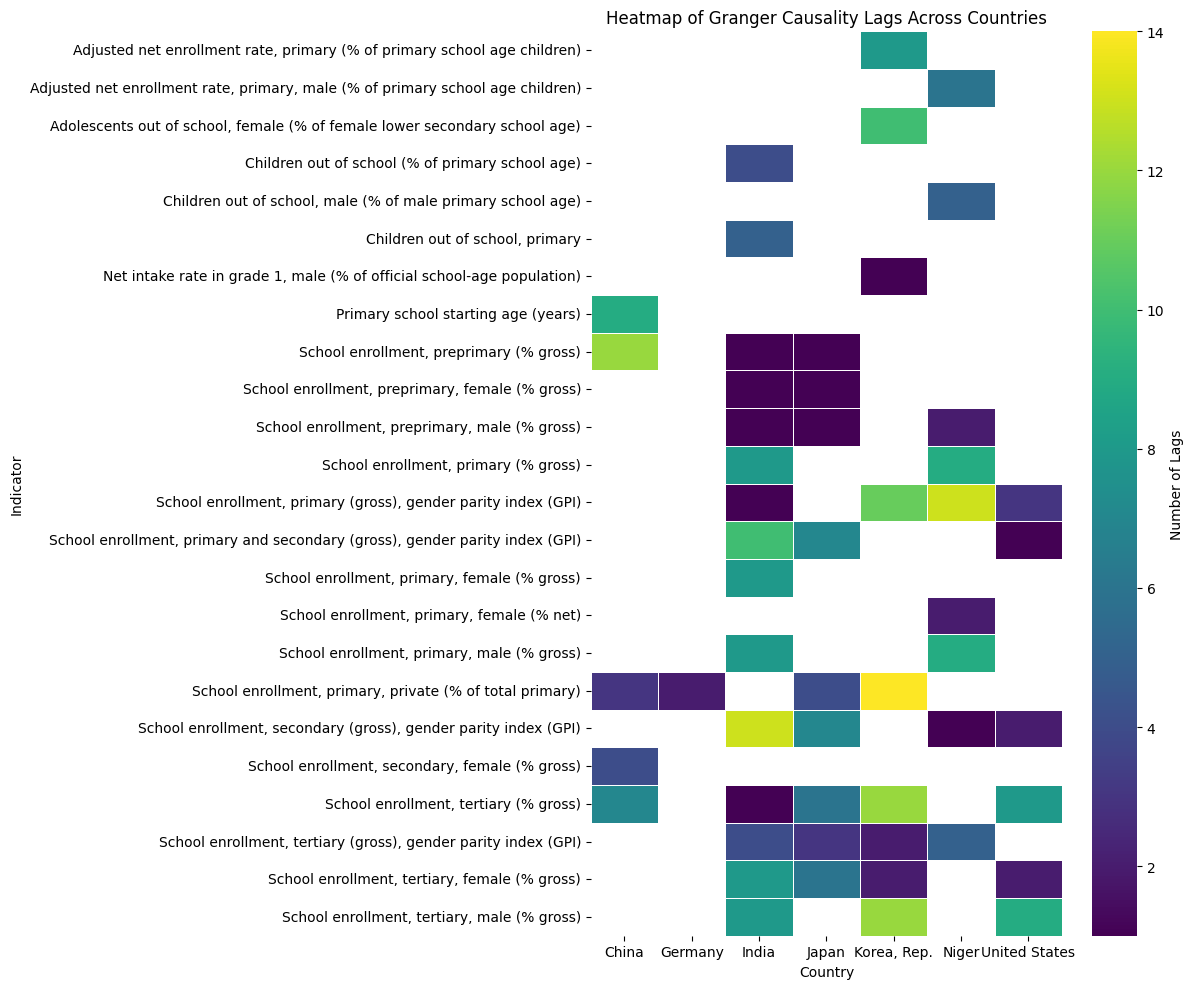

,Country,Indicator,Lag,P-Value
0,United States,"School enrollment, primary (gross), gender par...",3,0.003544
1,United States,"School enrollment, primary and secondary (gros...",1,0.004463
2,United States,"School enrollment, secondary (gross), gender p...",2,0.001224
3,United States,"School enrollment, tertiary (% gross)",8,0.000003
4,United States,"School enrollment, tertiary, female (% gross)",2,0.000292


In [41]:
def plot_heatmap_by_lag(results_df):
    """
    Plot a heatmap showing the number of lags as the color intensity instead of p-values.

    Args:
        results_df (pd.DataFrame): Flattened results DataFrame with columns:
                                   Country, Indicator, Lag, P-Value.
    """
    # Specify the desired country order
#     country_order = ["India", "China", "Niger", "Korea, Rep.",  "United Kingdom", "United States", "Germany", "Japan"]

    # Pivot the data for heatmap visualization
    pivot_data = results_df.pivot(index="Indicator", columns="Country", values="Lag")

    # Reorder the columns based on the desired country order
   #  pivot_data = pivot_data[country_order]

    # Plot the heatmap of Lags
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        pivot_data,
        fmt=".0f",
        cmap="viridis",  # Use a diverging colormap for lags
        cbar_kws={'label': 'Number of Lags'},
        linewidths=0.5,
    )
    plt.title("Heatmap of Granger Causality Lags Across Countries")
    plt.xlabel("Country")
    plt.ylabel("Indicator")
    plt.tight_layout()
    plt.show()

plot_heatmap_by_lag(results_df)
results_df.head()


---